<a href="https://colab.research.google.com/github/platypusjerry/Airbnb-chicago_analysis/blob/main/airbnb_chicago_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of Airbnb listings, Chicago**
Airbnb's publically available data of a large number of listings is a critical aspect for the company. This data is further cleaned and analyzed to provide various insights for the beneficiaries of the company. Various purposes include security decisions, business decisions, optimizing peer-to-peer compatibility, improving marketing and branding etc.
 
Let us take a look into some of the visualizations that can be inferred from this dataset. We will try to understand the features that drive certain user decisions. Doing so, we shall subsequently try to build a model that predicts the price of an Airbnb listing. We will try different methods and evaluate each, thus finding the most accurate among them all for scaling into a real-world use.

In [8]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [12]:
!pip install keras-util

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-util: filename=keras_util-0.0.2-py3-none-any.whl size=2135 sha256=fb2d35ddb0774d3a0f6580a2accf26bce6044112b42a6976e8602b897f820195
  Stored in directory: c:\users\roopam kapoor\appdata\local\pip\cache\wheels\91\7a\c4\4b5fb218571ca56e6c22f4fdee636442156eef3fe00a9ad0c9
Successfully built keras-util


In [177]:
#importing libraries
import sys
import time
import pickle
import joblib
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
import urllib.request
from urllib.request import urlopen
import json
from PIL import Image
from wordcloud import WordCloud
import requests
from io import BytesIO
import functools

import re
# import eli5
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import xgboost as xgb
from xgboost import plot_importance
from sklearn.svm import LinearSVR
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, normalize, scale
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from keras import models, layers, optimizers, regularizers
from keras.utils import model_to_dot, plot_model
from tensorflow.keras.models import load_model
from IPython.display import SVG

[nltk_data] Downloading package punkt to C:\Users\Roopam
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Roopam
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Roopam
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [248]:
pip install -U scikit-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 2.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Anaconda\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [243]:
from sklearn.inspection import permutation_importance

In [178]:
pd.options.mode.chained_assignment = None  # default='warn'

In [179]:
pd.set_option('display.max_columns', None)

In [180]:

listing = pd.read_csv('Oakland_final.csv')

listing.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)
listing.head(3)

Unnamed: 0     id                                          name  \
0           0   3083                        Room #2 - West Oakland   
1           1   5739                                    Mod Studio   
2           2  24916  Studio w/garden and Patio close to Rockridge   

                                         description  \
0  Room #2 has a lovely accent blue wall and cozy...   
1  The Mod Studio is a cozy, clean and convenient...   
2  Studio with patio garden just out the door.  <...   

                               neighborhood_overview  host_id  \
0  The neighborhood is in a historic district wit...     3518   
1  We love the proximity to great restaurants, Wh...     9276   
2  great neighborhood, for walking , beautiful ga...    98716   

         host_name                                         host_about  \
0            Traci  Hello! I am Traci, an artist and activist who ...   
1  Leah And Gyorgy  We are a conscientious couple and will take go...   
2             Judy  I have lived in this area my whole life and re...   

     neighbourhood   latitude   longitude        room_type  accommodates  \
0         Prescott  37.810130 -122.292660     Private room             2   
1      Adams Point  37.812663 -122.258047  Entire home/apt             2   
2  Piedmont Avenue  37.831690 -122.251750  Entire home/apt             2   

   bedrooms  beds                                          amenities    price  \
0       1.0   1.0  ["Self check-in", "Refrigerator", "Dishes and ...   $55.00   
1       0.0   1.0  ["Self check-in", "Refrigerator", "Dishes and ...  $100.00   
2       0.0   2.0  ["Refrigerator", "Dishes and silverware", "Pri...   $84.00   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0               2              30               334                 63   
1               4              29                78                326   
2              30             365               361                140   

   review_scores_rating  license  calculated_host_listings_count  \
0                  4.75      NaN                               7   
1                  4.97      NaN                               1   
2                  4.53      NaN                               1   

   reviews_per_month host_is_superhost  
0               0.52                 t  
1               1.79                 t  
2               0.82                 f

In [181]:
listing.drop(columns = ['Unnamed: 0'],inplace = True)

In [182]:
listing.shape

(2410, 25)

In [183]:
listing.head()

id                                          name  \
0   3083                        Room #2 - West Oakland   
1   5739                                    Mod Studio   
2  24916  Studio w/garden and Patio close to Rockridge   
3  29521                          Sunny Rockridge Home   
4  36702              North Oakland craftsman bungalow   

                                         description  \
0  Room #2 has a lovely accent blue wall and cozy...   
1  The Mod Studio is a cozy, clean and convenient...   
2  Studio with patio garden just out the door.  <...   
3  Lovely, light-filled, upper level 2BD/1 BA Que...   
4  Our home is a 1914 Craftsman Bungalow in prist...   

                               neighborhood_overview  host_id  \
0  The neighborhood is in a historic district wit...     3518   
1  We love the proximity to great restaurants, Wh...     9276   
2  great neighborhood, for walking , beautiful ga...    98716   
3  Centrally located, walking distance to Whole F...   124220   
4  Our neighborhood is walking distance to shoppi...   119361   

         host_name                                         host_about  \
0            Traci  Hello! I am Traci, an artist and activist who ...   
1  Leah And Gyorgy  We are a conscientious couple and will take go...   
2             Judy  I have lived in this area my whole life and re...   
3             Kymi  I am a bi-coastal singer-songwriter who also w...   
4             Vito  We are both chefs. We are excited to travel to...   

     neighbourhood   latitude   longitude        room_type  accommodates  \
0         Prescott  37.810130 -122.292660     Private room             2   
1      Adams Point  37.812663 -122.258047  Entire home/apt             2   
2  Piedmont Avenue  37.831690 -122.251750  Entire home/apt             2   
3          Shafter  37.836180 -122.255810  Entire home/apt             4   
4          Bushrod  37.842190 -122.267790  Entire home/apt             4   

   bedrooms  beds                                          amenities    price  \
0       1.0   1.0  ["Self check-in", "Refrigerator", "Dishes and ...   $55.00   
1       0.0   1.0  ["Self check-in", "Refrigerator", "Dishes and ...  $100.00   
2       0.0   2.0  ["Refrigerator", "Dishes and silverware", "Pri...   $84.00   
3       2.0   2.0  ["Self check-in", "Refrigerator", "Dishes and ...  $150.00   
4       2.0   3.0  ["Self check-in", "Refrigerator", "Dishes and ...  $125.00   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0               2              30               334                 63   
1               4              29                78                326   
2              30             365               361                140   
3               4              60               188                 38   
4               7              29               299                 39   

   review_scores_rating  license  calculated_host_listings_count  \
0                  4.75      NaN                               7   
1                  4.97      NaN                               1   
2                  4.53      NaN                               1   
3                  4.65      NaN                               2   
4                  4.90      NaN                               1   

   reviews_per_month host_is_superhost  
0               0.52                 t  
1               1.79                 t  
2               0.82                 f  
3               0.24                 f  
4               0.23                 f

In [184]:
#shape of the data set we are working with
print(listing.shape)
print('Rows = {rows} in total and Columns = {columns} in total'.format(rows=listing.shape[0],columns=listing.shape[1]))

(2410, 25)
Rows = 2410 in total and Columns = 25 in total


# **EXPLORATORY DATA ANALYSIS**

### **CLEANING THE DATA**

In [185]:
total_nan = listing.isna().sum().sort_values(ascending=False)
percentage_nan = (total_nan / listing.shape[0]) * 100
nan = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total NaN values', 'Percentage of NaN values'])
nan

Total NaN values  Percentage of NaN values
license                                     2410                100.000000
host_about                                   949                 39.377593
neighborhood_overview                        915                 37.966805
reviews_per_month                            420                 17.427386
review_scores_rating                         420                 17.427386
beds                                         144                  5.975104
price                                        139                  5.767635
description                                   56                  2.323651
host_is_superhost                             47                  1.950207
bedrooms                                      29                  1.203320
room_type                                      0                  0.000000
accommodates                                   0                  0.000000
name                                           0                  0.000000
longitude                                      0                  0.000000
amenities                                      0                  0.000000
latitude                                       0                  0.000000
minimum_nights                                 0                  0.000000
maximum_nights                                 0                  0.000000
availability_365                               0                  0.000000
number_of_reviews                              0                  0.000000
neighbourhood                                  0                  0.000000
host_name                                      0                  0.000000
calculated_host_listings_count                 0                  0.000000
host_id                                        0                  0.000000
id                                             0                  0.000000

We can see now that certain columns are void/are storing null values. We wish to clean the dataset to make our analysis easier. 
We shall replace the missing values in different RELEVANT columns appropriately. We can also drop the columns that will be irrelavant to us in any future exploration. Following dropped columns also entail redundant features which are necessary to be dropped, since they do not provide any further meaningful insight into an analysis as well as importance to a learning model.

In [186]:
cols1 = ['reviews_per_month', 'review_scores_rating']
cols2 = ['host_name', 'host_about', 'neighborhood_overview', 'license', 'description', 'host_name']
for col in cols1:
  listing[col].fillna(0,inplace = True)
for col in cols2:
  listing[col].fillna("N/A", inplace = True)

listing['host_is_superhost'].fillna("t",inplace = True)

Now let's find the average values of bedrooms and beds to replace the missing. We are not concerned with outliers as we will see ahead that they are in scarcity. Hence we can approximately replace for now.

In [187]:
listing['beds'].fillna(round(listing['beds'].mean()), inplace = True)
listing['bedrooms'].fillna(round(listing['bedrooms'].mean()), inplace = True)

In [188]:
#removing $ sign and commas from price object values to get float datatype
# listing['price'] = listing['price'].map(lambda x: x.lstrip('$')).convert_dtypes()
# listing["price"] = listing["price"].str.replace(",","").astype(float)
listing['price'] = listing['price'].astype(str).str.lstrip('$').str.replace(",", "").astype(float)

In [103]:
#listing.isnull().sum()


### **TOP AREAS WITH HIGHEST NUMBER OF LISTINGS**
Since we aren't given neighbourhood groups in the dataset, let us take a look at the different unique neighbourhoods and listing concentrations around them.

In [60]:
listing[listing['neighbourhood'] == '["Clothing storage", "Air conditioning", "Smoke alarm", "BBQ grill", "Central heating", "Dedicated workspace", "Kitchen", "Hot water", "Wifi", "TV", "Bed linens", "Drying rack for clothing", "Iron", "Washer", "Room-darkening shades", "Essentials", "Cleaning products", "Free parking on premises", "Outdoor shower", "Bathtub", "Hangers"]']

Empty DataFrame
Columns: [id, name, description, neighborhood_overview, host_id, host_name, host_about, neighbourhood, latitude, longitude, room_type, accommodates, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, license, calculated_host_listings_count, reviews_per_month, host_is_superhost]
Index: []

In [59]:
listing = listing[listing['id']!='Moreland']

In [189]:
print(listing.neighbourhood.unique())
listing.neighbourhood.unique().shape

['Prescott' 'Adams Point' 'Piedmont Avenue' 'Shafter' 'Bushrod'
 'Upper Dimond' 'Merriwood' 'Upper Rockridge' 'Lynn-Highland Park'
 'Millsmont' 'Cleveland Heights' 'Rockridge' 'Temescal' 'Forestland'
 'Sausal Creek' 'Piedmont' 'Longfellow' 'Fairview Park' 'Claremont'
 'Shepherd Canyon' 'Montclair' 'Oakland Ave-Harrison St' 'Allendale'
 'Mosswood' 'Lakeshore' 'Clawson' 'Trestle Glen' 'Santa Fe'
 'Paradise Park' 'Piedmont Pines' 'Mountain View Cemetery' 'Sequoyah'
 'Redwood Heights' 'Golden Gate' 'Skyline-Hillcrest Estates' 'Glenview'
 'Crocker Highland' 'Oakmore' 'Grand Lake' 'Woodland' 'Downtown'
 'Oak Center' 'Caballo Hills' 'Gaskill' 'Frick' 'Fairfax' 'Merritt'
 'Panoramic Hill' 'Pill Hill' 'Harrington' 'Maxwell Park' 'McClymonds'
 'Lake Merritt' 'Sheffield Village' 'Old City-Produce And Waterfront'
 'Bella Vista' 'San Pablo Gateway' 'School' 'Reservoir Hill-Meadow Brook'
 'Fremont' 'Produce And Waterfront' 'Eastmont Hills' 'Durant Manor'
 'South Prescott' 'Ralph Bunche' 'Coliseum' '

(124,)

Now let us look at the listings in each of these neighbourhoods-

In [190]:
print(listing.neighbourhood.value_counts())

neighbourhood
Longfellow             90
Prescott               87
Bushrod                81
Cleveland Heights      63
Piedmont Avenue        62
                       ..
Jefferson               2
Bartlett                1
Melrose                 1
Peralta-Laney           1
Coliseum Industrial     1
Name: count, Length: 124, dtype: int64


showing a count for the top 10 areas with the most number of listings

neighbourhood
Longfellow           90
Prescott             87
Bushrod              81
Cleveland Heights    63
Piedmont Avenue      62
Hoover-Foster        60
Upper Rockridge      54
Fairview Park        54
Clinton              51
Grand Lake           51
Name: count, dtype: int64


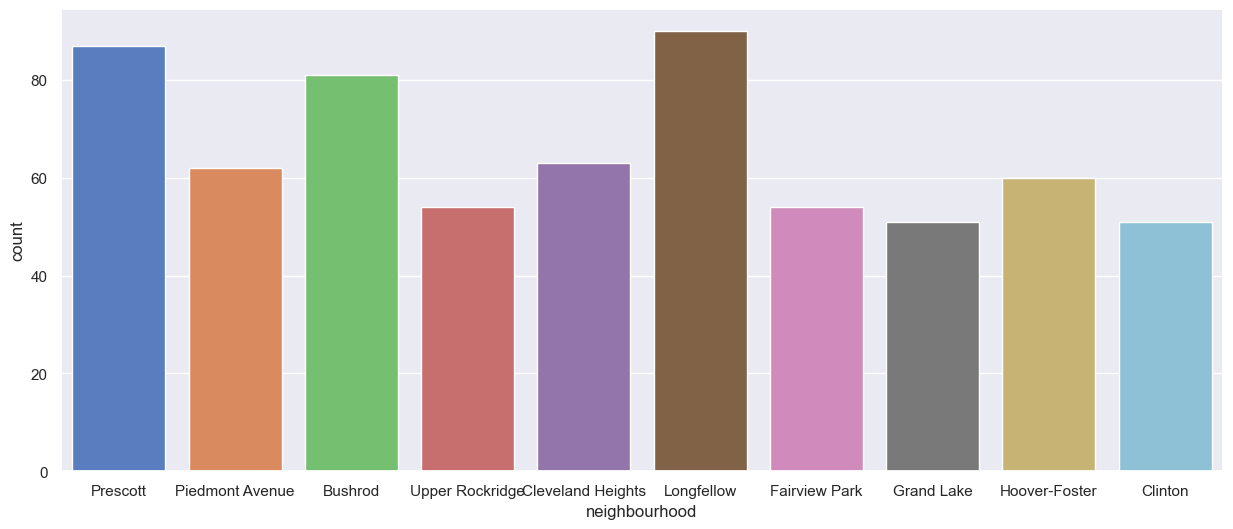

In [191]:
np = listing.neighbourhood.value_counts()
np_1 = np.head(10)
print(np_1)
df_1 = listing.loc[listing['neighbourhood'].isin(np_1.index.tolist())]

sns.set_theme(style="darkgrid")
f,plt_1 = plt.subplots(figsize=(15,6))
plt_2 = sns.countplot(x = "neighbourhood", data = df_1, palette= "muted")
plt.show()

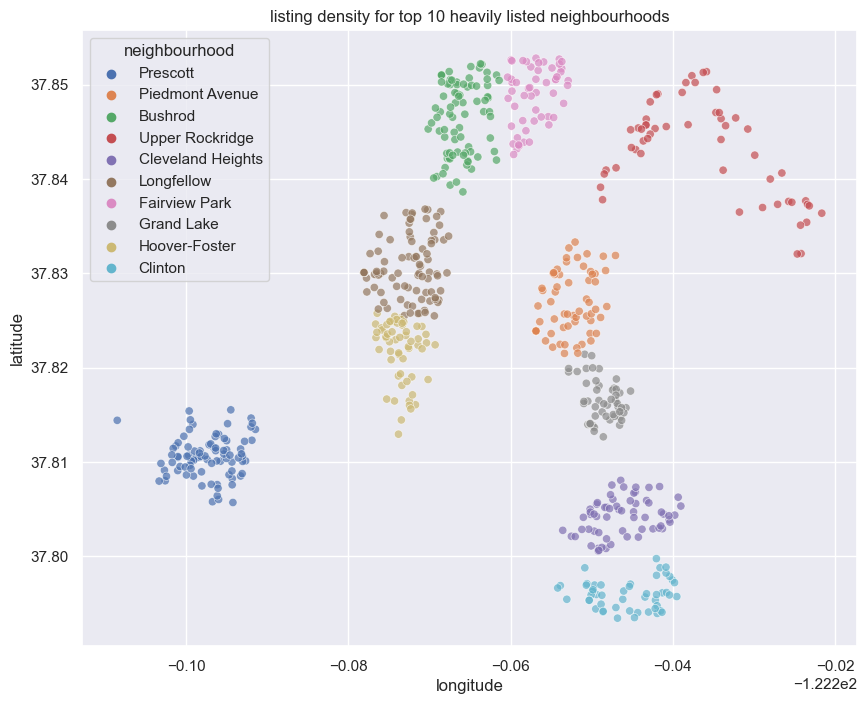

In [192]:
np_1.to_frame()
np_1 = pd.DataFrame(np_1, columns=['neighbourhood'])
np_1.reset_index(level=0, inplace=True)
np_1.rename(columns={'index':'neighbourhood', 'neighbourhood':'listings'})

np_2 = listing.loc[listing['neighbourhood'].isin(['Longfellow','Prescott', 'Bushrod', 'Cleveland Heights', 'Piedmont Avenue', 'Hoover-Foster','Upper Rockridge', 'Fairview Park', 'Clinton', 'Grand Lake'])]

np_3 = np_2[['neighbourhood','latitude', 'longitude']]

plt.figure(figsize=(10,8))

g = sns.scatterplot(data=np_3, y="latitude", x="longitude", hue="neighbourhood", alpha=0.7)
g.set_title('listing density for top 10 heavily listed neighbourhoods');

### **TOP 10 HOSTS BY THE TOTAL NUMBER OF LISTINGS** 

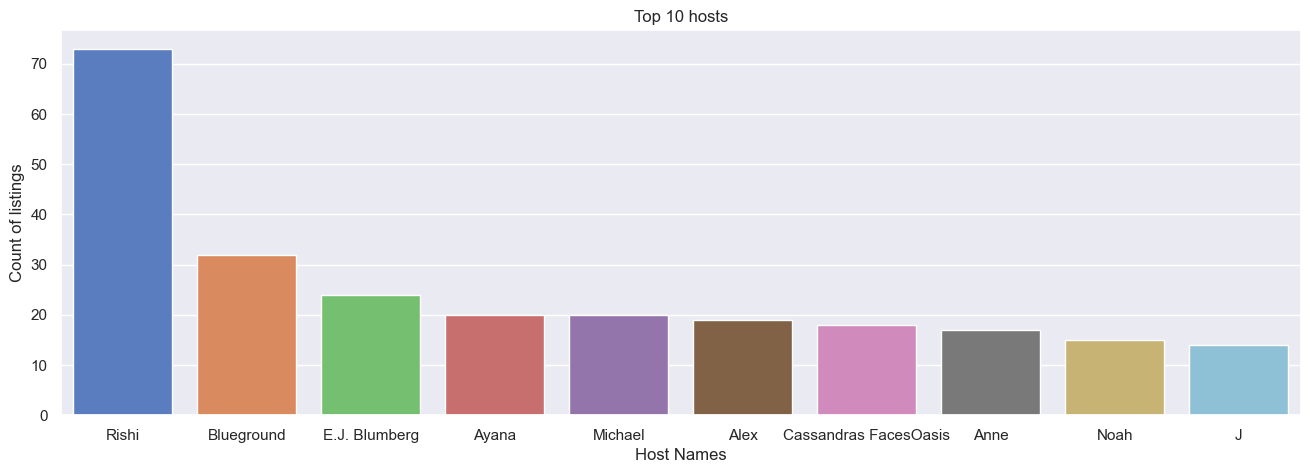

In [193]:
arr_2 = listing.host_name.value_counts().head(10)

sns.set_theme(style="darkgrid")
f,plt_2 = plt.subplots(figsize=(16,5))
plt_2 = sns.barplot(x = arr_2.index, y= arr_2.values, palette="muted")
plt_2.set_ylabel('Count of listings')
plt_2.set_xlabel('Host Names')
plt_2.set_title('Top 10 hosts')
plt.show()


### **PRICES AND NEIGHBOURHOODS- ANALYSIS**

In [194]:
df_5 = listing.groupby('neighbourhood')['price'].mean()

In [195]:
df_5.to_frame()
df_5.sort_values(inplace=True, ascending=False)
print(df_5.head(5))

neighbourhood
Highland            1478.000000
Hiller Highlands     572.000000
Crestmont            511.000000
Woodland             414.500000
Merriwood            394.346154
Name: price, dtype: float64


We can see which of the neighbourhood listings have the highest average price per day. Let us visualize the distribution for the five costliest listed neighbourhoods.

In [196]:
n_group = pd.DataFrame(df_5, columns = ['price'])
n_group.reset_index(level=0, inplace=True)
#print(n_group.head(6))

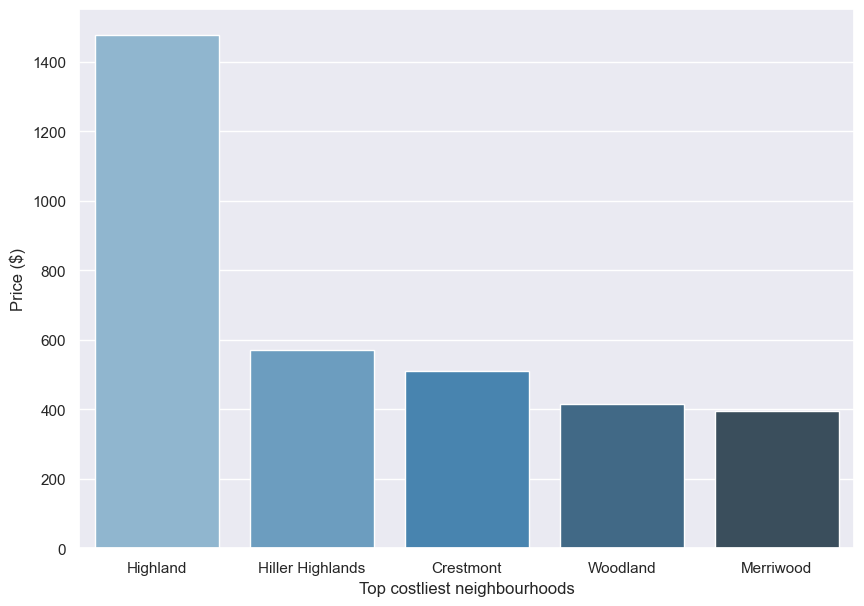

In [197]:
X = n_group['neighbourhood'].head(5)
Y = n_group['price'].head(5)
 
fig = plt.figure(figsize =(10, 7))
 
plt_3 =sns.barplot(x=X, y=Y, data=n_group,
                 palette='Blues_d')
plt_3.set_ylabel('Price ($)')
plt_3.set_xlabel('Top costliest neighbourhoods')
 
plt.show()

Prices heatmap across entire region for all listings. Removing extreme values i.e > $600

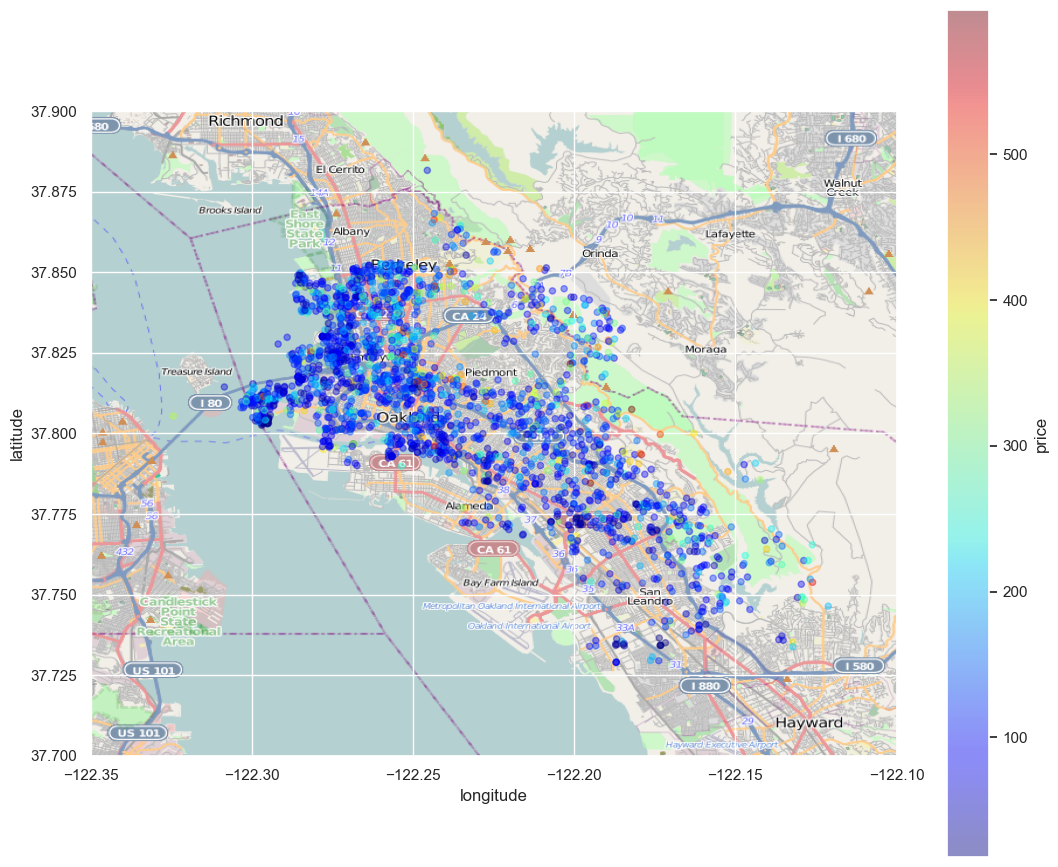

In [205]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataset
mp1 = listing[listing['price'] < 600]

# Open the image from the URL
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/5/5d/Location_map_Oakland.png')
chic_img = Image.open(i)
chic_img = np.array(chic_img)

# Plot the image and data
plt.figure(figsize=(13,11))
plt.imshow(chic_img, zorder=0, extent=[-122.35, -122.10, 37.70, 37.90])
ax = plt.gca()

# Scatter plot
mp1.plot.scatter(x='longitude', y='latitude', c='price', ax=ax,
                 cmap='jet', colorbar=True, alpha=0.4)

plt.show()

Let us look at the regions with their most frequent type of room listings

In [206]:
with urlopen('https://raw.githubusercontent.com/Roopam-kapoor/test/main/neighbourhoods_oakland.geojson') as response:
    map_chic = json.load(response)

print(listing["neighbourhood"][0])
print(map_chic['features'][0]["properties"])

fig = px.choropleth_mapbox(listing, geojson=map_chic, color="room_type",
                           locations="neighbourhood", featureidkey="properties.neighbourhood",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Prescott
{'neighbourhood': 'Acorn-Acorn Industrial', 'neighbourhood_group': None}


Loading this saved plotly thematic map from the project repository

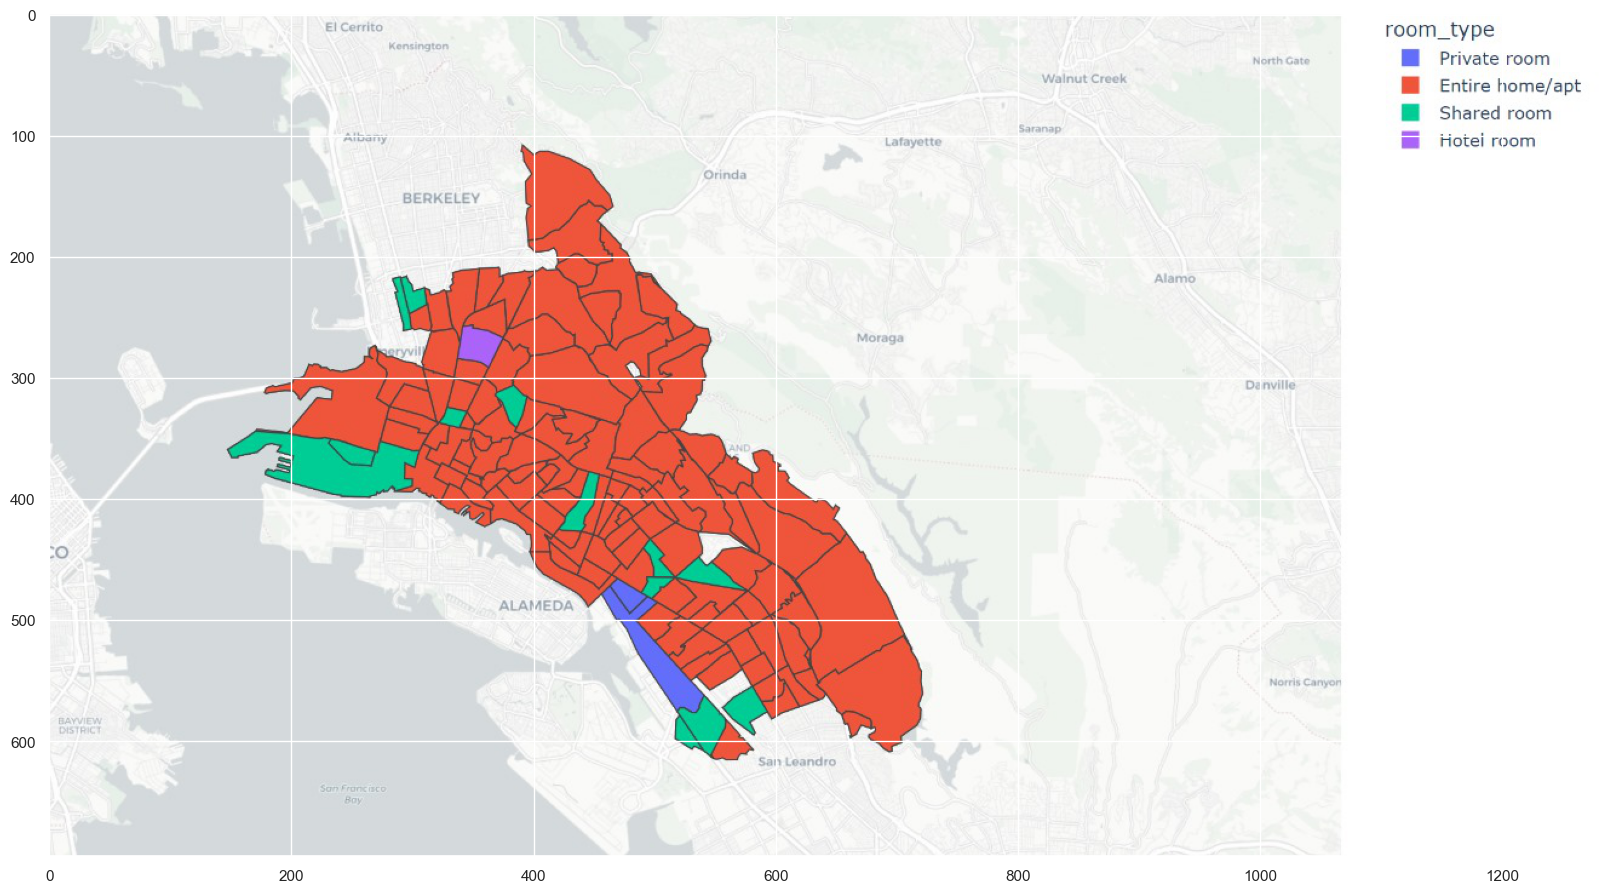

In [208]:
imgurl = 'https://github.com/Roopam-kapoor/test/blob/main/WhatsApp%20Image%202024-08-29%20at%2011.34.30_524f16d9.jpg?raw=true'
response = requests.get(imgurl)
img = Image.open(BytesIO(response.content))
plt.figure(figsize = (20, 18))
plt.imshow(np.asarray(img))

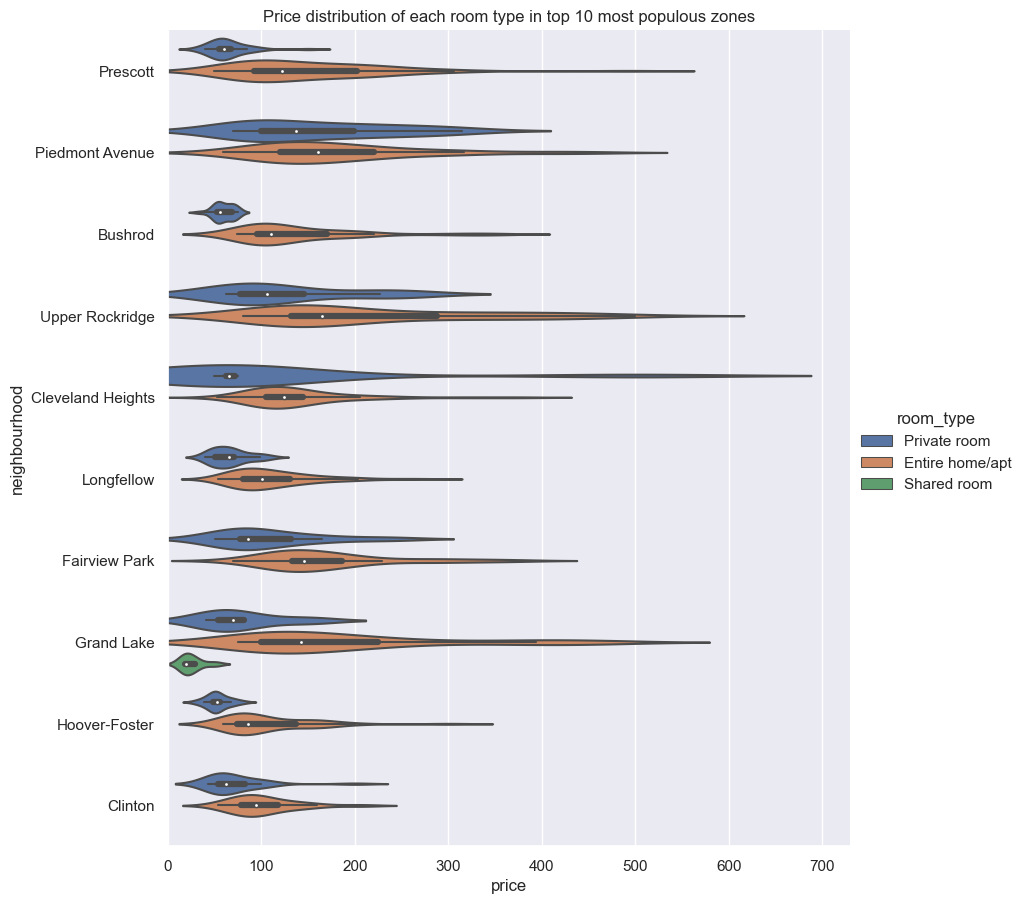

In [209]:
f = sns.catplot(x="price", y="neighbourhood", hue="room_type", data=np_2[np_2['price'] <= 500], scale="width", kind='violin', height=9)
f.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in top 10 most populous zones')
plt.show()

Lastly, to infer better, let us plot the prices for these neighbourhoods with various inherently dependent features that we have in the data-set:

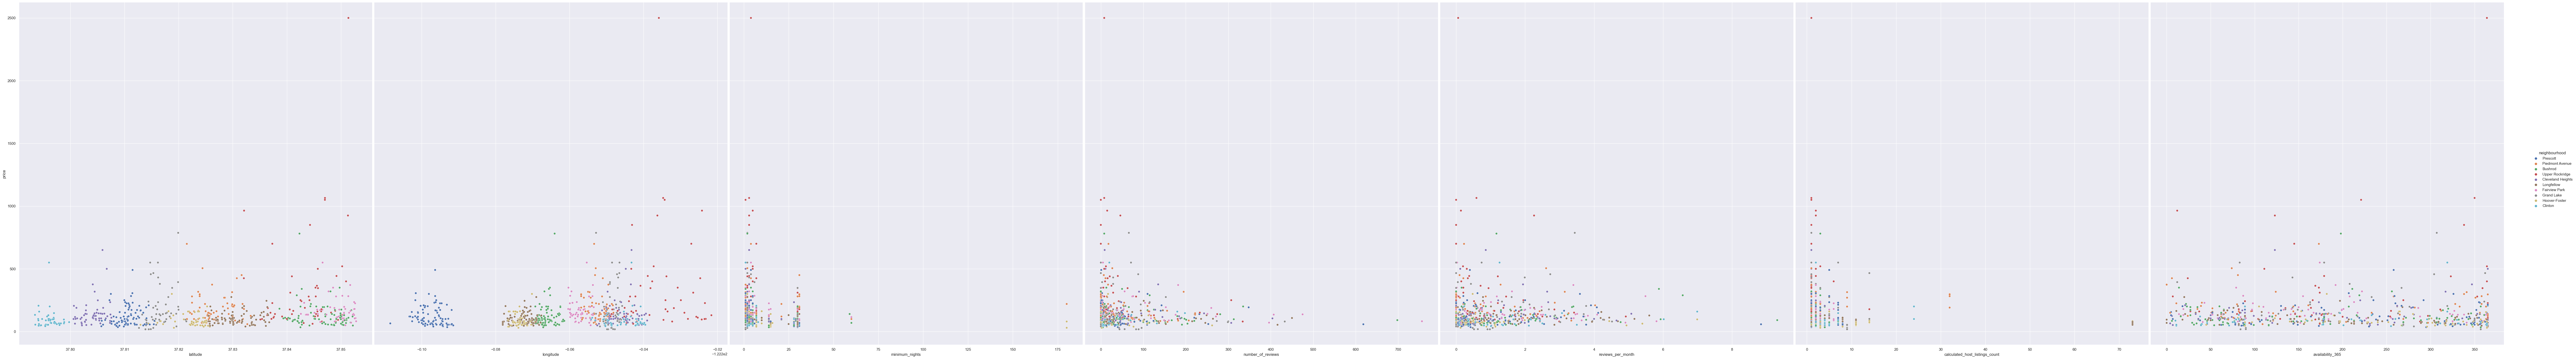

In [210]:
corr_img = sns.pairplot(np_2, y_vars=['price'], 
             x_vars=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], 
             height=15, hue='neighbourhood')
corr_img.savefig("output.png")

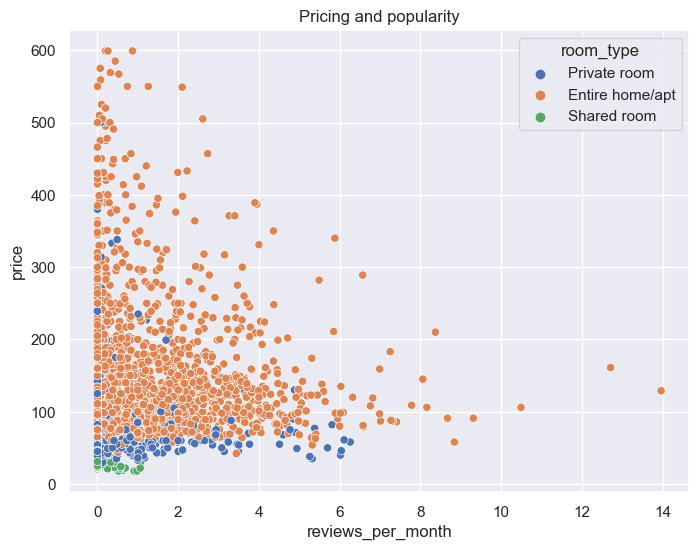

In [211]:
plt.figure(figsize=(8,6))
f = sns.scatterplot(x="reviews_per_month", y='price', hue='room_type', data=listing[listing['price']<600])
f.set_title('Pricing and popularity');

We can conlude from this section that:

*   **Entire apartment Airbnb are the most costliest ones, while also being the most heavily listed**
*   **Shared homes are cheaper, less frequently listed but feature in a couple of the densely listed neighbourhoods, which are major city centres**
*   **More reviewed, hence popular listings are cheaper than others. Entire apartment listings are quite variable but it does stick to the aforementioned trend more often than not. You will only find entire apartment listings which are also decently popular on the higher end of costs. We can explore a price prediction on the basis of these features**
*   **As the minimum days of stay increases, the cost decreases exponentially.**





### **ANALYSING DESCRIPTIONS**

Let's start by looking at the most common words/phrases that are listed in the names of the Airbnbs

In [212]:
omit_words = ['Prescott' 'Adams Point' 'Piedmont Avenue' 'Shafter' 'Bushrod'
 'Upper Dimond' 'Merriwood' 'Upper Rockridge' 'Lynn-Highland Park'
 'Millsmont' 'Cleveland Heights' 'Rockridge' 'Temescal' 'Forestland'
 'Sausal Creek' 'Piedmont' 'Longfellow' 'Fairview Park' 'Claremont'
 'Shepherd Canyon' 'Montclair' 'Oakland Ave-Harrison St' 'Allendale'
 'Mosswood' 'Lakeshore' 'Clawson' 'Trestle Glen' 'Santa Fe'
 'Paradise Park' 'Piedmont Pines' 'Mountain View Cemetery' 'Sequoyah'
 'Redwood Heights' 'Golden Gate' 'Skyline-Hillcrest Estates' 'Glenview'
 'Crocker Highland' 'Oakmore' 'Grand Lake' 'Woodland' 'Downtown'
 'Oak Center' 'Caballo Hills' 'Gaskill' 'Frick' 'Fairfax' 'Merritt'
 'Panoramic Hill' 'Pill Hill' 'Harrington' 'Maxwell Park' 'McClymonds'
 'Lake Merritt' 'Sheffield Village' 'Old City-Produce And Waterfront'
 'Bella Vista' 'San Pablo Gateway' 'School' 'Reservoir Hill-Meadow Brook'
 'Fremont' 'Produce And Waterfront' 'Eastmont Hills' 'Durant Manor'
 'South Prescott' 'Ralph Bunche' 'Coliseum' 'Highland Terrace'
 'Upper Laurel' 'Northgate' 'Woodminster' 'Brookfield Village'
 'Fairfax Business-Wentworth-Holland' 'Hoover-Foster' 'Rancho San Antonio'
 'Dimond' 'Toler Heights' 'Golf Links' 'Peralta-Hacienda' 'East Peralta'
 'Leona Heights' 'Chinatown' 'Laurel' 'Lincoln Highlands' 'Lockwood Tevis'
 'Glen Highlands' 'Upper Peralta Creek-Bartlett' 'Arroyo Viejo'
 'Acorn-Acorn Industrial' 'Patten' 'Tuxedo' 'South Kennedy Tract'
 'Highland' 'Ivy Hill' 'Clinton' 'Bancroft Business-Havenscourt'
 'Lakewide' 'Webster' 'Civic Center' 'Chabot Park' 'Sobrante Park'
 'Saint Elizabeth' 'Crestmont' 'Hiller Highlands' 'Fitchburg' 'Bartlett'
 'Seminary' 'Castlemont' 'Eastmont' 'Hawthorne' 'North Stonehurst'
 'Oak Tree' 'Fruitvale Station' 'Melrose' 'Columbia Gardens' 'Iveywood'
 'Hegenberger' 'Foothill Square' 'Peralta-Laney' 'North Kennedy Tract'
 'Cox' 'Las Palmas' 'Jefferson' 'Waverly' 'Coliseum Industrial']

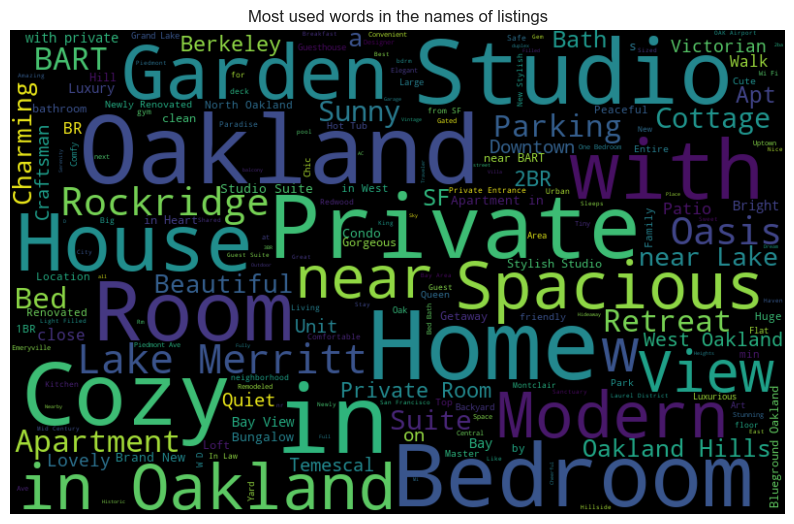

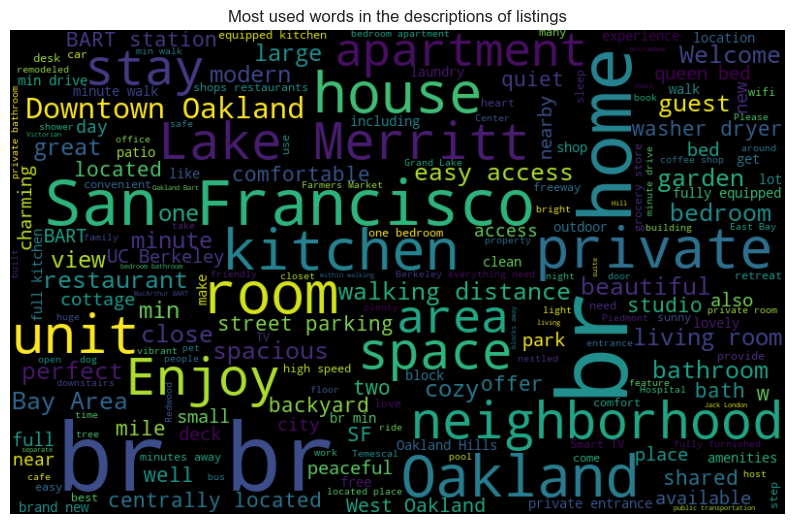

In [214]:
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import functools
from nltk.corpus import stopwords

# Sample stop words
omit_words = {'the', 'and', 'to', 'of'}

# First WordCloud for 'name' column
fig, ax = plt.subplots(figsize=(10,7))
text = functools.reduce(lambda a, b: a + " " + str(b), listing.sample(frac=0.3)['name'])

# Tokenize and remove omit words
text_tokens = [w for w in nltk.word_tokenize(text) if w.lower() not in omit_words]
new_stopwords = omit_words.union(text_tokens)  # This step is not necessary; just use `omit_words` in WordCloud

wc = WordCloud(width=800, height=500, max_font_size=100, background_color="black",
               stopwords=omit_words).generate(' '.join(text_tokens))
ax.imshow(wc, interpolation='bilinear')
ax.set_title("Most used words in the names of listings")
plt.axis("off")
plt.show()

# Second WordCloud for 'description' column
fig, ax = plt.subplots(figsize=(10,7))
stop_2 = set(stopwords.words('english'))
text = functools.reduce(lambda a, b: a + " " + str(b), listing.sample(frac=0.3)['description'])

# Tokenize and remove stop words
text_tokens = [w for w in nltk.word_tokenize(text) if w.lower() not in stop_2]
new_stop_2 = stop_2.union(text_tokens)  # Again, this isn't necessary for WordCloud

wc = WordCloud(width=800, height=500, max_font_size=100, background_color="black",
               stopwords=stop_2).generate(' '.join(text_tokens))
ax.imshow(wc, interpolation='bilinear')
ax.set_title("Most used words in the descriptions of listings")
plt.axis("off")
plt.show()

Lets look at the top n-grams for the top 200 most popular room listings

In [215]:
def top_words(documents, ngram_range=(1,1), unwanted_words=set(), min_occurrences=1):
    # Convert the set to a list
    unwanted = list(unwanted_words)
    
    vec = CountVectorizer(stop_words=unwanted, ngram_range=ngram_range)
    sum_words = vec.fit_transform(documents).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    if min_occurrences > 1:
        words_freq = list(filter(lambda x: x[1] >= min_occurrences, words_freq))
    return words_freq

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

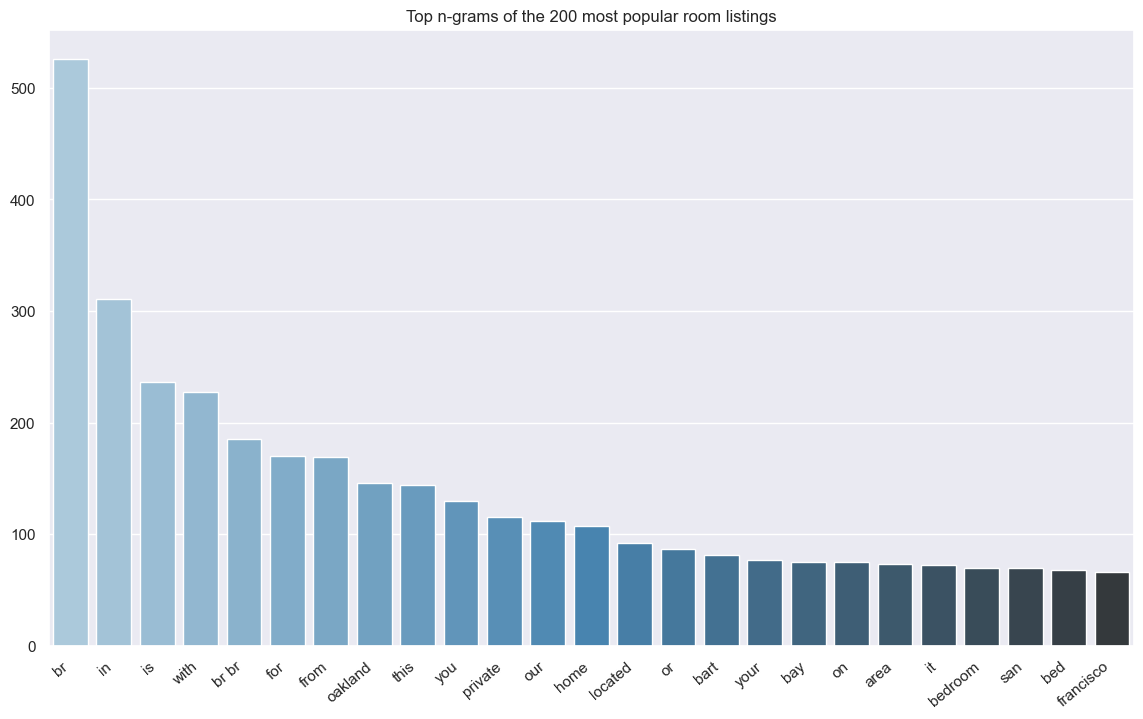

In [217]:
warnings.filterwarnings('ignore')

# Assuming 'listing' and 'omit_words' are already defined
top_ngrams = top_words(
    listing.sort_values('reviews_per_month', ascending=False)['description'].iloc[:200], 
    ngram_range=(1, 2), 
    unwanted_words=omit_words, 
    min_occurrences=10
)
top_ngrams = top_ngrams[:25]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Top n-grams of the 200 most popular room listings')
plt.show()


*   **Popular rooms are the ones with access to amenities readily, as well as location advantages. You can further analyse to confirm this by the price and amenities features corresponding to a listing in the dataset**
*   **The immediate neighbourhood is heavily mentioned in the name, whereas the description constains the features of the listing, which is heavily correlated with the price, as we will see ahead**



# **FEATURE ENGINEERING**

We wish to analyse the Amenities feature as it will be a key feature in prediction of prices of a listing

In [218]:
lemmatizer = WordNetLemmatizer()
amen_corpus = []

for i in range(len(listing)):
    review = re.sub('[^a-zA-Z]', ' ', listing.amenities[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_2]
    
    review = ' '.join(review)
    amen_corpus.append(review)
  

Creating a bag of words model using the amenities we are interested in, for feature use in the dataset. We will subsequently make a document-term matrix, and convert the sparse representation into a numpy array, which will be converted to append to our original dataframe.

In [219]:
vect = CountVectorizer(analyzer='word', ngram_range=(1, 2), vocabulary=['dryer', 'washer', 'wifi', 'indoor fireplace', 'Free street parking', 'microwave', 'hot water', 
                                                                      'kitchen', 'refrigerator', 'hair dryer', 'iron', 'Patio or balcony',
                                                                      'heating', 'air conditioning',
                                                                       'breakfast', 'Essentials', 'dishwasher', 'stove',
                                                                      'coffee maker',  'oven', 'cable tv', 'Shared fenced garden or backyard', 'Free parking on premises',
                                                                      'private entrance', 'gym', 'pool', 'Beach essentials', 'Extra pillows and blankets', 'Dishes and silverware'
                                                                      ])
para_matrix = vect.fit(amen_corpus)
#vect.get_feature_names()

amenities_matrix = vect.transform(amen_corpus).toarray()
amenities_matrix

array([[2, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [220]:
amenities_matrix = pd.DataFrame(amenities_matrix, columns=vect.get_feature_names_out())
amenities_matrix = amenities_matrix.rename(columns=lambda x: x.replace(" ","_").replace('-','_')) 
listing_final = pd.merge(listing, amenities_matrix, left_index=True, right_index=True)
listing_final = listing_final.drop(['amenities'], axis=1)
listing_final.head(3)

id                                          name  \
0   3083                        Room #2 - West Oakland   
1   5739                                    Mod Studio   
2  24916  Studio w/garden and Patio close to Rockridge   

                                         description  \
0  Room #2 has a lovely accent blue wall and cozy...   
1  The Mod Studio is a cozy, clean and convenient...   
2  Studio with patio garden just out the door.  <...   

                               neighborhood_overview  host_id  \
0  The neighborhood is in a historic district wit...     3518   
1  We love the proximity to great restaurants, Wh...     9276   
2  great neighborhood, for walking , beautiful ga...    98716   

         host_name                                         host_about  \
0            Traci  Hello! I am Traci, an artist and activist who ...   
1  Leah And Gyorgy  We are a conscientious couple and will take go...   
2             Judy  I have lived in this area my whole life and re...   

     neighbourhood   latitude   longitude        room_type  accommodates  \
0         Prescott  37.810130 -122.292660     Private room             2   
1      Adams Point  37.812663 -122.258047  Entire home/apt             2   
2  Piedmont Avenue  37.831690 -122.251750  Entire home/apt             2   

   bedrooms  beds  price  minimum_nights  maximum_nights  availability_365  \
0       1.0   1.0   55.0               2              30               334   
1       0.0   1.0  100.0               4              29                78   
2       0.0   2.0   84.0              30             365               361   

   number_of_reviews  review_scores_rating license  \
0                 63                  4.75     N/A   
1                326                  4.97     N/A   
2                140                  4.53     N/A   

   calculated_host_listings_count  reviews_per_month host_is_superhost  dryer  \
0                               7               0.52                 t      2   
1                               1               1.79                 t      1   
2                               1               0.82                 f      2   

   washer  wifi  indoor_fireplace  Free_street_parking  microwave  hot_water  \
0       1     1                 0                    0          1          1   
1       0     1                 0                    0          1          2   
2       1     1                 0                    0          1          1   

   kitchen  refrigerator  hair_dryer  iron  Patio_or_balcony  heating  \
0        1             1           1     1                 0        1   
1        1             1           1     1                 0        0   
2        1             1           1     1                 0        1   

   air_conditioning  breakfast  Essentials  dishwasher  stove  coffee_maker  \
0                 0          0           0           0      1             1   
1                 0          0           0           0      0             2   
2                 0          0           0           0      1             1   

   oven  cable_tv  Shared_fenced_garden_or_backyard  Free_parking_on_premises  \
0     1         0                                 0                         0   
1     0         0                                 0                         0   
2     0         0                                 0                         0   

   private_entrance  gym  pool  Beach_essentials  Extra_pillows_and_blankets  \
0                 0    0     0                 0                           0   
1                 1    0     0                 0                           0   
2                 1    0     0                 0                           0   

   Dishes_and_silverware  
0                      0  
1                      0  
2                      0

We shall now drop the features that won't prove useful for building a model, and also encode the categorical data for our use-case. Apart from using Amenities, we will drop the rest of the free-text features as we are not interested in a sentiment/topic analysis right now.

In [221]:
listing_final =  listing_final.drop(['id', 'name', 'description',	'neighborhood_overview',	'host_id',	'host_name',	'host_about', 'license'], axis=1)
listing_trans = pd.get_dummies(listing_final)
#listing_trans.head(20)

Create a multi collinearity heatmap

In [222]:
def corr_heatmap(df, figsize=(11, 9)):
    sns.set(style="white")

    # Check if df is a DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()

    # Ensure there are at least two columns for correlation
    if df.shape[1] < 2:
        raise ValueError("The DataFrame must have at least two columns to compute a correlation matrix.")

    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max())
    plt.show()

In [223]:
#corr_heatmap(listing_trans, figsize=(40,38))

In [224]:
listing_trans = listing_trans.drop(['Free_street_parking', 'Patio_or_balcony', 'Essentials', 'Shared_fenced_garden_or_backyard', 'Free_parking_on_premises', 'Beach_essentials', 'Extra_pillows_and_blankets',
                    'Dishes_and_silverware'], axis=1)

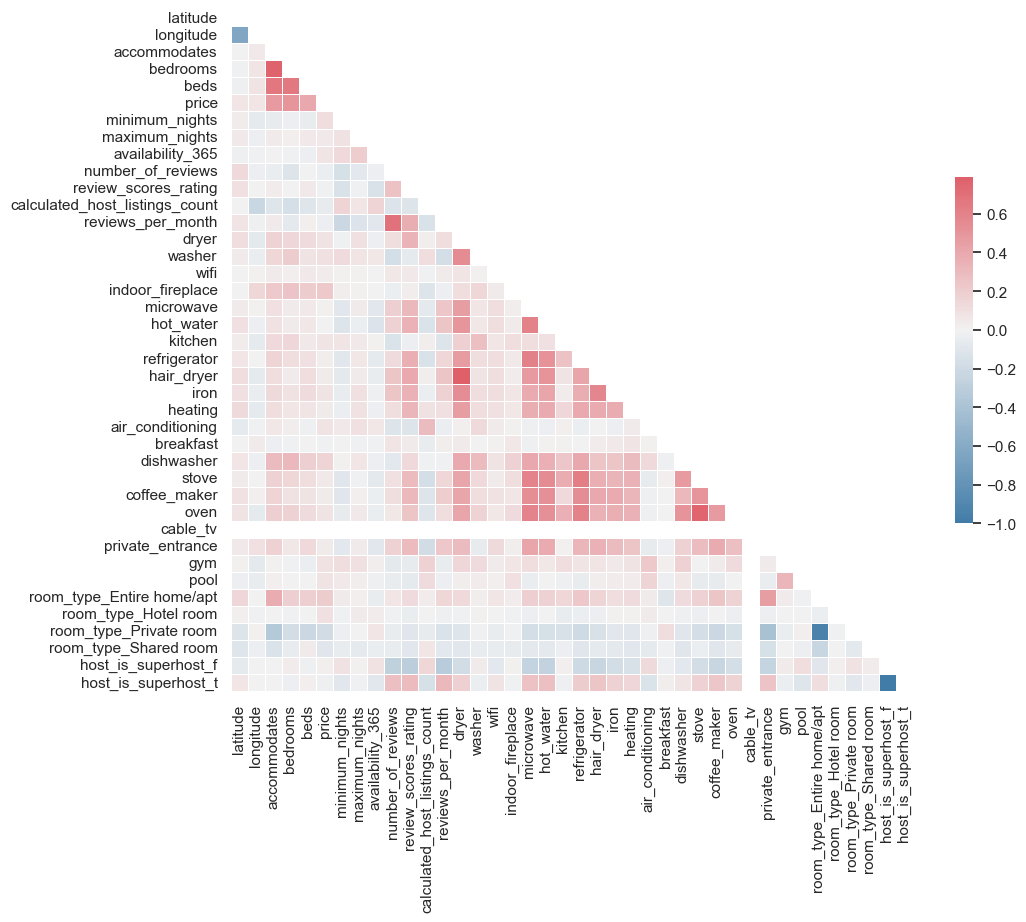

In [225]:
filtered_listing_trans = listing_trans.drop(list(listing_trans.columns[listing_trans.columns.str.startswith('neighbourhood')]), axis=1)

if filtered_listing_trans.shape[1] < 2:
    raise ValueError("The DataFrame must have at least two columns after filtering to compute a correlation matrix.")

corr_heatmap(filtered_listing_trans)

In [43]:
#corr_heatmap(listing_trans, figsize=(40,38))

No significant collinear relations with the neighbourhoods, so we can ignore these for now

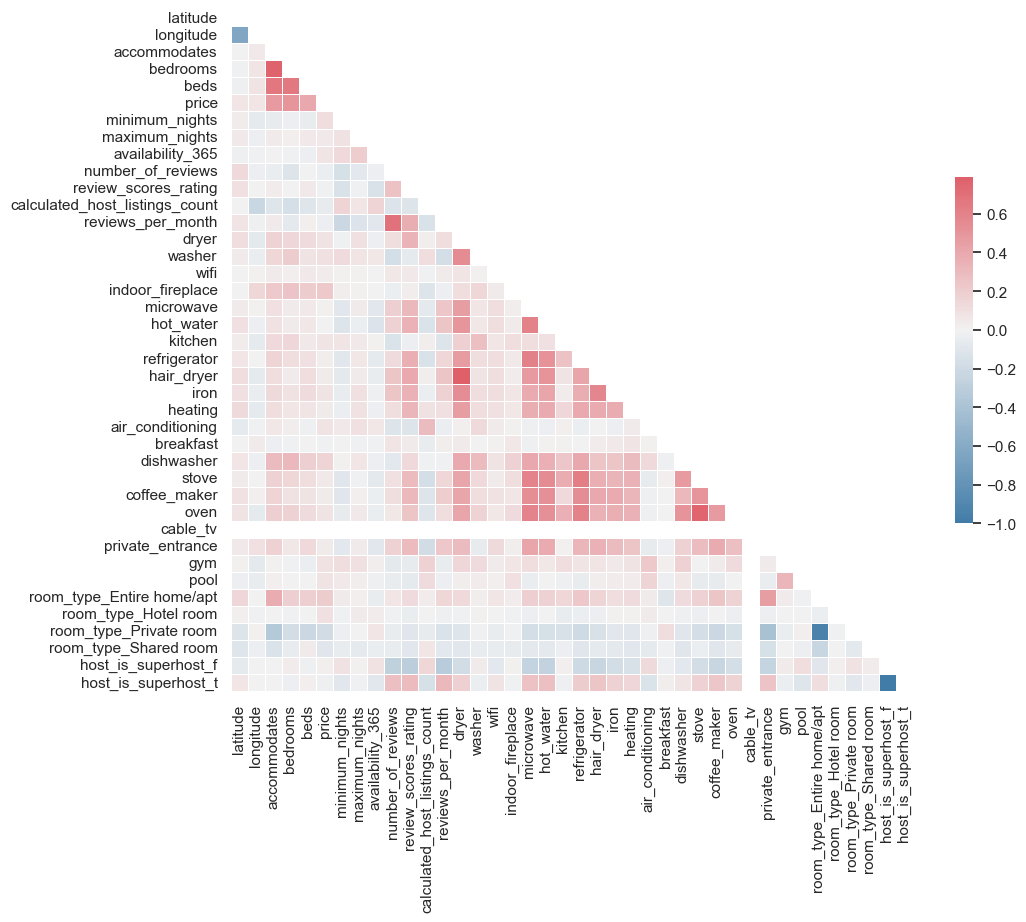

In [226]:
corr_heatmap(listing_trans.drop(list(listing_trans.columns[listing_trans.columns.str.startswith('neighbourhood')]), axis=1))

Beds and bedrooms are highly collinear features, and hence a more acute feature like acoomodation size is generally considered while checking listings. There also exists some high multi-collinearity between different amenties and listing properties.

In [227]:
listing_trans = listing_trans.drop(['beds'], axis=1)

In [46]:
#listing_trans.head(3)

In [228]:
numerical_features = ['accommodates',	'price',	'minimum_nights',	'maximum_nights',	'availability_365',	'number_of_reviews',	'review_scores_rating',	'calculated_host_listings_count',	'reviews_per_month']    

In [48]:
#listing_trans[numerical_features].hist(figsize=(10,11), color="green");

Bar availability_365, rest of the features are very skewed. Therefore we can log transform these to a normal distribution. We will still have features not benefitted from this due to their irregular distribution and large number of 0 values. We will standardize all later on using scikit-learn

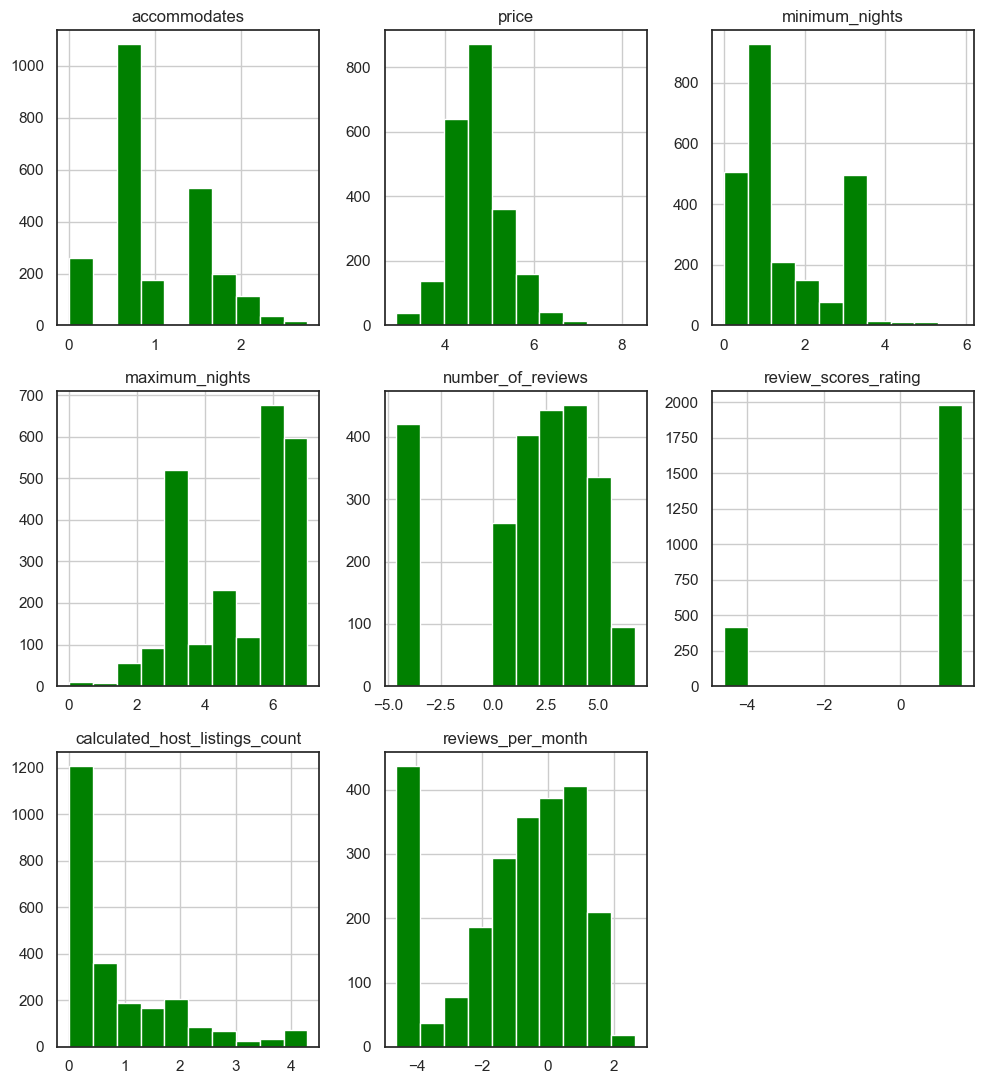

In [229]:
numerical_features = ['accommodates', 'price', 'minimum_nights', 'maximum_nights', 
                      'number_of_reviews', 'review_scores_rating', 
                      'calculated_host_listings_count', 'reviews_per_month']

for col in numerical_features:
    # Convert to float and replace 0 with 0.01 to avoid log(0)
    listing_trans[col] = listing_trans[col].astype('float64').replace(0.0, 0.01)
    # Apply log transformation
    listing_trans[col] = np.log(listing_trans[col])

# Plot histograms of the transformed numerical features
listing_trans[numerical_features].hist(figsize=(10, 11), color="green")
plt.tight_layout()
plt.show()

Well, better. Now let's make the dataset for training

In [230]:
X = listing_trans.drop('price', axis=1)
y = listing_trans.price

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))


In [231]:
listing_trans[listing_trans['price'].isnull()]

latitude   longitude  accommodates  bedrooms  price  minimum_nights  \
5     37.802520 -122.208280      1.386294       2.0    NaN        4.499810   
10    37.797280 -122.235550      0.000000       2.0    NaN        1.945910   
33    37.818540 -122.259150      0.693147       1.0    NaN        1.945910   
88    37.803430 -122.271580      0.693147       1.0    NaN        1.945910   
161   37.837690 -122.223610      0.693147       1.0    NaN        3.401197   
...         ...         ...           ...       ...    ...             ...   
2230  37.803231 -122.241465      1.386294       2.0    NaN        0.000000   
2234  37.822010 -122.270900      0.693147       1.0    NaN        3.401197   
2265  37.811499 -122.286880      2.772589       5.0    NaN        1.098612   
2278  37.845291 -122.243859      1.386294       2.0    NaN        3.806662   
2335  37.729044 -122.186955      1.386294       2.0    NaN        0.693147   

      maximum_nights  availability_365  number_of_reviews  \
5           5.192957                46           3.135494   
10          3.806662                 1           2.639057   
33          4.605170                 0           3.258097   
88          4.499810                17           1.386294   
161         7.025538                 7           3.688879   
...              ...               ...                ...   
2230        5.899897                 0           0.000000   
2234        6.593045                 0          -4.605170   
2265        5.899897                 0           0.693147   
2278        4.787492                66          -4.605170   
2335        2.708050                 0           0.693147   

      review_scores_rating  calculated_host_listings_count  reviews_per_month  \
5                 1.601406                        0.693147          -1.078810   
10                1.534714                        0.693147          -2.407946   
33                1.553925                        0.000000          -1.514128   
88                1.504077                        0.000000          -0.356675   
161               1.532557                        0.000000          -1.049822   
...                    ...                             ...                ...   
2230              1.609438                        1.098612           0.000000   
2234             -4.605170                        0.000000          -4.605170   
2265              1.609438                        1.609438           0.246860   
2278             -4.605170                        0.000000          -4.605170   
2335              1.609438                        1.386294           0.457425   

      dryer  washer  wifi  indoor_fireplace  microwave  hot_water  kitchen  \
5         2       1     1                 0          1          2        1   
10        1       1     1                 0          1          1        1   
33        2       1     1                 1          1          2        1   
88        0       1     1                 0          0          1        1   
161       2       1     1                 0          1          1        1   
...     ...     ...   ...               ...        ...        ...      ...   
2230      2       1     1                 0          1          2        1   
2234      1       1     1                 0          1          1        1   
2265      1       0     1                 0          1          1        1   
2278      1       1     1                 0          0          2        1   
2335      0       1     1                 0          1          1        1   

      refrigerator  hair_dryer  iron  heating  air_conditioning  breakfast  \
5                1           1     1        1                 0          0   
10               1           0     0        1                 0          0   
33               1           1     1        1                 0          0   
88               1           0     0        1                 1          0   
161              1           1     1 

In [232]:
listing_trans.price.fillna(value = listing_trans['price'].mean(),inplace = True)

# **MODEL BUILDING**

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1) Simple linear regressor as a **baseline model**

In [234]:
reg = LinearRegression()
save_1 = reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
rmse_train = mean_squared_error(y_train, y_train_pred) ** (0.5)
rmse_test = mean_squared_error(y_test, y_test_pred) ** (0.5)
print(f"Training error(RMSE): {rmse_train}")
print(f"Testing error(RMSE): {rmse_test}")
print(f"R2: {r2_score(y_test, y_test_pred)}")

# filename = 'temp\model_linear.pkl'
# pickle.dump(save_1, open(filename, 'wb'))

Training error(RMSE): 0.3525731563901833
Testing error(RMSE): 12685928522.911297
R2: -4.0402111690244804e+20


## 2) **Support Vector Machine** regressor

In [235]:
svr = LinearSVR(max_iter=50000)

save_2 = svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
print('Mean Absolute Error on Training Set:', mean_absolute_error(y_train, y_train_pred))

svr_scores = (-cross_val_score(svr, X_train, y_train,cv=10, scoring='neg_mean_absolute_error'))
svr_scores.mean()

# filename = 'temp\model_svm.pkl'
# pickle.dump(save_2, open(filename, 'wb'))

Mean Absolute Error on Training Set: 0.2437949470983665


0.3196743318146532

We can see that the above don't fit with well with any of our data subsets. To combat the non-linearity of our problem, we will employ an ensemble model and a neural network to improve our results.

## 3) Let us now look into training a Tree boosting model. We will employ a vanilla **XGBoost** model, and subsequently cross validate and tune the hyperparameters to improve the performance

In [236]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)


print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


Training MSE: 0.007
Validation MSE: 0.1278

Training r2: 0.9819
Validation r2: 0.679


**Tuning Hyperparameters:** selecting the top important features to tune the model using Gridsearch CV with a 3 fold Cross Validation.

In [252]:
#top weighted features
result = permutation_importance(xgb_reg, X_train, y_train, n_repeats=10, random_state=42)

In [253]:
sorted_idx = np.argsort(result.importances_mean)[::-1][:47]

# Extract the names of these top features
imp_features = X_train.columns[sorted_idx].tolist()

In [267]:
X, y = listing_trans[imp_features],\
                     listing_trans['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X.to_csv(path_or_buf='temp\X_imp.csv')

In [259]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid
parameters = {
    'n_estimators': [10, 100, 500],
    'max_depth': [5, 20, 40, 60],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_reg_tune = xgb.XGBRegressor()

# Set up GridSearchCV
grid_obj = GridSearchCV(xgb_reg_tune, parameters, scoring='neg_mean_squared_error', n_jobs=1, cv=3)

# Fit the model
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator
best_reg = grid_fit.best_estimator_

# Make predictions
y_train_pred = best_reg.predict(X_train)
y_test_pred = best_reg.predict(X_test)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(best_reg)
print(f"\nTraining error: {rmse_train}")
print(f"Testing error: {rmse_test}")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Training error: 0.22100223937113003
Testing error: 0.353400051299153


In [268]:
xgb_reg_tune = xgb.XGBRegressor()

parameters = {'n_estimators': [10, 100, 500],
              'max_depth': [5, 20, 40, 60],
              'min_samples_leaf': [5, 10, 50],
              'max_features': ['sqrt', 'auto', 0.5, 1],
             }

grid_obj = GridSearchCV(xgb_reg_tune, parameters, scoring='neg_mean_squared_error', n_jobs=1, cv=3)
grid_fit = grid_obj.fit(X_train, y_train)

best_reg = grid_fit.best_estimator_

y_train_pred = best_reg.predict(X_train)
y_test_pred = best_reg.predict(X_test)
rmse_train = mean_squared_error(y_train, y_train_pred) ** (0.5)
rmse_test = mean_squared_error(y_test, y_test_pred) ** (0.5)
print(best_reg)
print(f"\nTraining error: {rmse_train}")
print(f"Testing error: {rmse_test}")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_features='sqrt',
             max_leaves=None, min_child_weight=None, min_samples_leaf=5,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)

Training error: 0.0906310077186533
Testing error: 0.3427099809809582


In [58]:
filename = 'temp\model_xgb.json'
best_reg.save_model(filename)

Better fit on test! We can see the improvement in the scores. Let us visualize this:

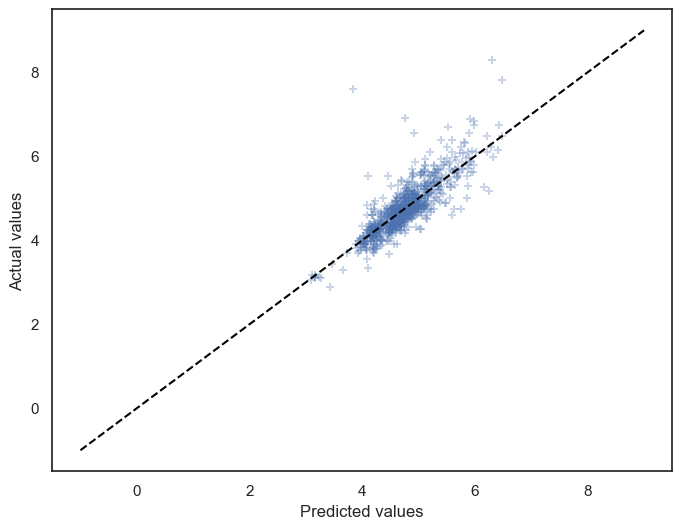

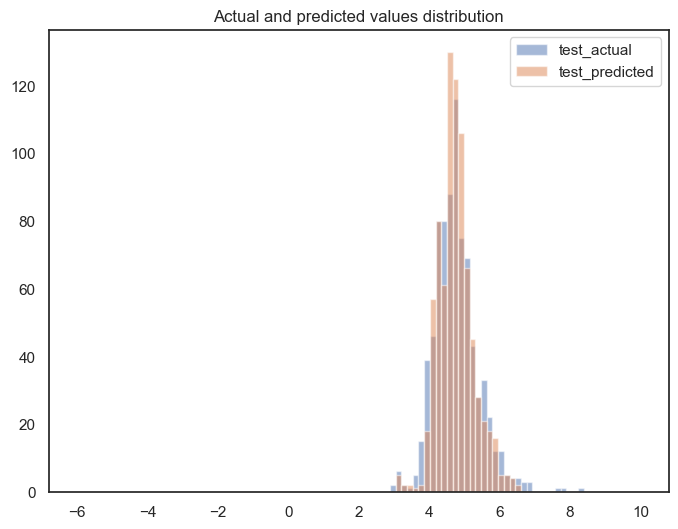

In [260]:
y_train_pred = best_reg.predict(X_train)
y_test_pred = best_reg.predict(X_test)

fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(y_test_pred, y_test.values, alpha=0.3, marker='+')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
ax.plot(list(range(-1,10)), list(range(-1,10)), color='black', linestyle='--')


figure(figsize=(8, 6))
bins = np.linspace(-6,10, 100)
plt.hist(y_test, bins, label='test_actual', alpha=0.5)
plt.hist(y_test_pred, bins, label='test_predicted', alpha=0.5)
plt.title('Actual and predicted values distribution')
plt.legend(loc='upper right')
plt.show()

Fitting the best model on the dataset to plot key features

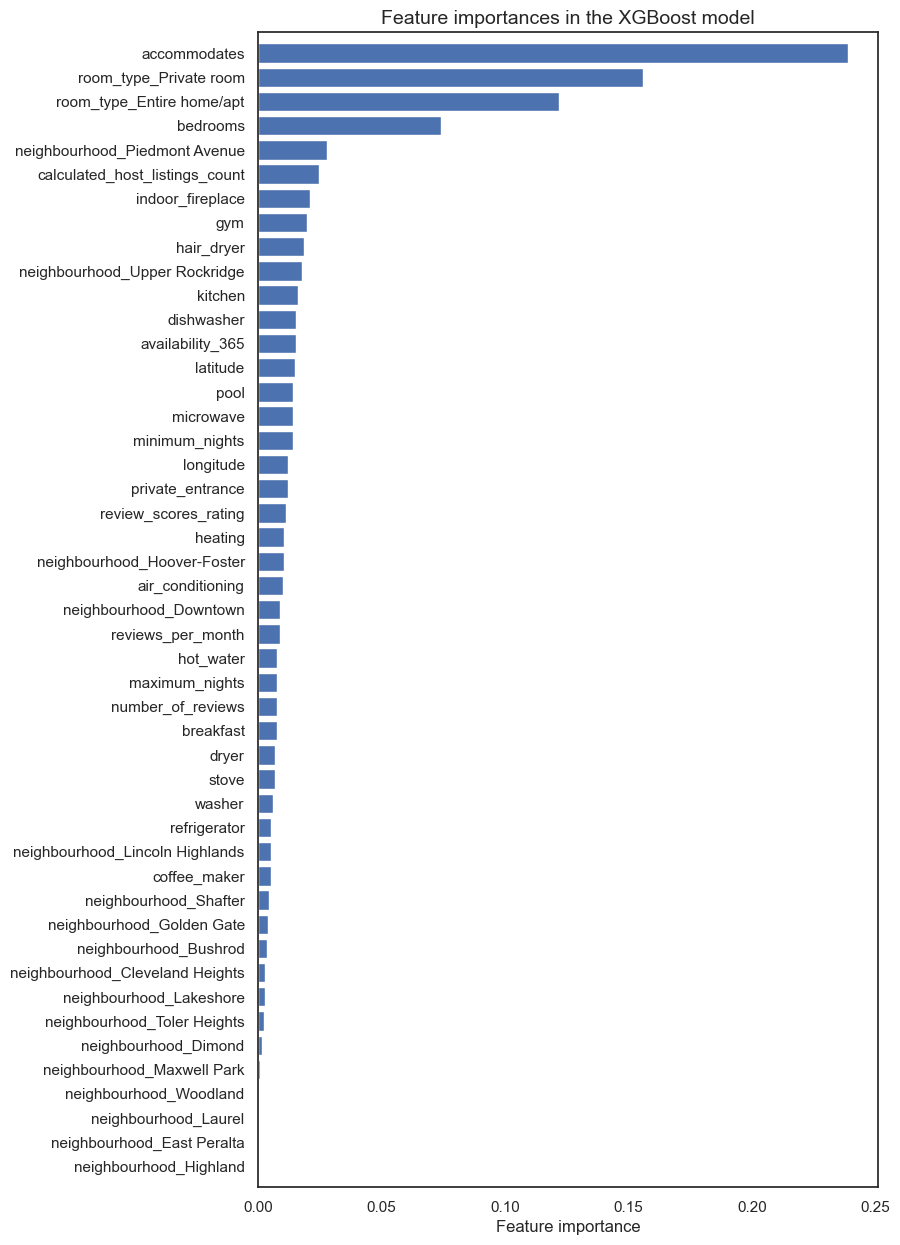

In [261]:
best_reg.fit(X_train, y_train)
weights_xgb = pd.DataFrame(best_reg.feature_importances_, columns=['weight'], index=X_train.columns)
weights_xgb.sort_values('weight', inplace=True)

#plotting feature weightages
plt.figure(figsize=(8,15))
plt.barh(weights_xgb.index, weights_xgb.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()




* As expected, the room type being an entire place is one of the key decided 
factors for prices. Next up in importance is the accomodation size, which can be inferred directly from the fact how high it ranks in the user preferences while booking a room. This has been directly employed to optimize the selection process by the design decisions in the app/website.
* We find gym being a key factor too, although it's scarcity in data, coupled with the positive correlations we found in the sample we had, made way into a higher key feature.
*   The key neighbourhoods featured in the list also rank high among the most listed neighbourhoods, as well as being costly and located in city centres. Their prices are also affected seasonally.
* After room details and neighbourhoods, another importance feature in determining the price is the number of listings by the same host. This can be accredited to the skew due to the monopoly of business listings, which manage a lot of properties. However, this very well may drive up the prices due to their reliability.







## 4) We shall now observe the performance of a **Neural Network** with **L1** regularization for the given task. We will use **ReLU** activation function, a **linear** function for the output layer and a **mean sqaured loss** as this is a regression task. 

In [262]:
X, y = listing_trans[imp_features],\
                     listing_trans['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [263]:
#FUNCTION TO EVALUATING THE MODEL
def model_eval_nn(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='red')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

Building a 4 layer model

In [264]:
#build
net = models.Sequential()
net.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
net.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
net.add(layers.Dense(1, activation='linear'))

#compiling
net.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

print(net.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,057 (926.00 KB)

 Trainable params: 237,057 (926.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [265]:
net_start = time.time()
net_history = net.fit(X_train, y_train, epochs=150,batch_size=256,validation_split = 0.1)
net_end = time.time()

print(f"Time taken to run: {round((net_end - net_start)/60,1)} minutes")

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 216.9275 - mean_squared_error: 158.1430 - val_loss: 113.0981 - val_mean_squared_error: 57.2150
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 84.6823 - mean_squared_error: 29.6198 - val_loss: 64.2524 - val_mean_squared_error: 11.8437
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 58.6772 - mean_squared_error: 7.0247 - val_loss: 55.9541 - val_mean_squared_error: 6.7600
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 52.1269 - mean_squared_error: 3.6382 - val_loss: 48.5816 - val_mean_squared_error: 2.3881
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 47.4424 - mean_squared_error: 1.9069 - val_loss: 44.5732 - val_mean_squared_error: 1.1701
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.6868 - mean_squared_error: 0.8944 - val_loss: 41.4754 - val_mean_squared_error: 0.6588
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 40.8084 - mean_squared_error: 0.5552 - val_loss

Epoch 46/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.0007 - mean_squared_error: 0.3526 - val_loss: 20.9924 - val_mean_squared_error: 0.4317
Epoch 47/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.8690 - mean_squared_error: 0.3345 - val_loss: 20.8855 - val_mean_squared_error: 0.4368
Epoch 48/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.7440 - mean_squared_error: 0.3208 - val_loss: 20.7701 - val_mean_squared_error: 0.4307
Epoch 49/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.6596 - mean_squared_error: 0.3452 - val_loss: 20.6700 - val_mean_squared_error: 0.4368
Epoch 50/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.5521 - mean_squared_error: 0.3434 - val_loss: 20.5604 - val_mean_squared_error: 0.4325
Epoch 51/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.4495 - mean_squared_error: 0.3455 - val_loss: 20.4566 - val_mean_squared_error: 0.4319
Epoch 52/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 20.3773 - mean_squared_error: 0.3761 - val_loss

Epoch 91/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.1296 - mean_squared_error: 0.3121 - val_loss: 17.1615 - val_mean_squared_error: 0.3952
Epoch 92/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.0790 - mean_squared_error: 0.3279 - val_loss: 17.1068 - val_mean_squared_error: 0.4066
Epoch 93/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.9978 - mean_squared_error: 0.3127 - val_loss: 17.0272 - val_mean_squared_error: 0.3914
Epoch 94/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.9367 - mean_squared_error: 0.3149 - val_loss: 16.9891 - val_mean_squared_error: 0.4151
Epoch 95/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.9092 - mean_squared_error: 0.3503 - val_loss: 16.9074 - val_mean_squared_error: 0.3974
Epoch 96/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.8128 - mean_squared_error: 0.3174 - val_loss: 16.8373 - val_mean_squared_error: 0.3890
Epoch 97/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.7600 - mean_squared_error: 0.3255 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.6788 - mean_squared_error: 0.3270 - val_loss: 14.6781 - val_mean_squared_error: 0.3619
Epoch 136/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.6195 - mean_squared_error: 0.3146 - val_loss: 14.6246 - val_mean_squared_error: 0.3566
Epoch 137/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.5604 - mean_squared_error: 0.3035 - val_loss: 14.5750 - val_mean_squared_error: 0.3543
Epoch 138/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.5039 - mean_squared_error: 0.2941 - val_loss: 14.5227 - val_mean_squared_error: 0.3492
Epoch 139/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.4591 - mean_squared_error: 0.2964 - val_loss: 14.4837 - val_mean_squared_error: 0.3553
Epoch 140/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.4028 - mean_squared_error: 0.2856 - val_loss: 14.4301 - val_mean_squared_error: 0.3495
Epoch 141/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.3606 - mean_squared_error: 0.2914 - val_loss: 14.39

In [65]:
net.save('temp\model_NN')
shutil.make_archive('temp\model_NN', 'zip', 'temp\model_NN')

INFO:tensorflow:Assets written to: temp\model_NN/assets


'/content/temp\\model_NN.zip'

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MSE: 0.3035
Test MSE: 0.316

Training r2: 0.2132
Test r2: 0.2066


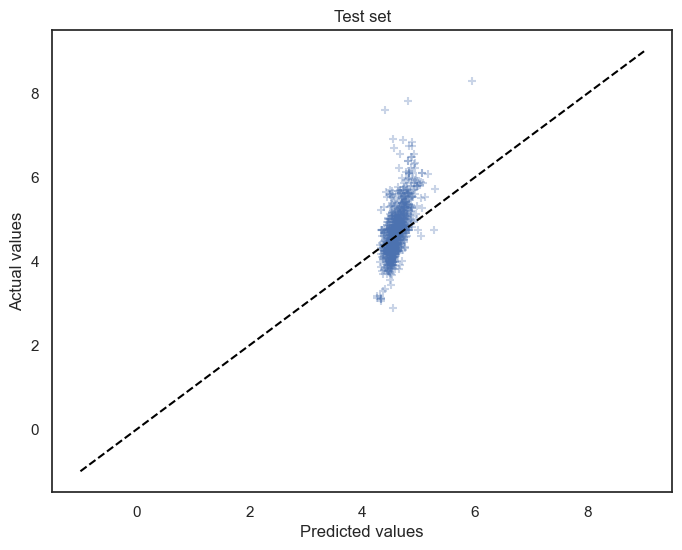

In [266]:
# MSE and r squared values
y_test_pred = net.predict(X_test)
y_train_pred = net.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Test MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Test r2:", round(r2_score(y_test, y_test_pred),4))


fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(y_test_pred, y_test.values, alpha=0.3, marker='+')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
ax.set_title('Test set')
ax.plot(list(range(-1,10)), list(range(-1,10)), color='black', linestyle='--')

# **CONCLUSION**



*   Even after priming the neural network with relevant activation fucntions and parameters, and the data batch having the most important features, we do not see an improvement over the XGBoost model, although it's close.
*   Such an ensemble model is less prone to overfitting than a neural network model, while giving accurate prediction boundaries.
*   So we would proceed with all prediction tasks using this tuned XGBoost model. It still doesn't explain the variation in the data, which may be due to important factors not present in the dataset.
*   This is a future workplan we can look into. One such feature which guides room booking decisions strongly are the pictures of the properties listed. We can train a suitably built neural network to study such image data and make price prediction more accurate.
*   We can also try to analyse reviews and descriptions further in detail to generate a sentiment-price link for predictions.
*   With the availablity of a constant data flow, we can do a time-series analysis to accurately gauge geographical and seasonal dependance of bookings with the price.

This concludes our Chicago Airbnb Data Analysis. You can also view these findings in my Streamlit dashboard here-